# VARMAX models

This is a brief introduction notebook to VARMAX models in statsmodels. The VARMAX model is generically specified as:
$$
y_t = \nu + A_1 y_{t-1} + \dots + A_p y_{t-p} + B x_t + \epsilon_t +
M_1 \epsilon_{t-1} + \dots M_q \epsilon_{t-q}
$$

where $y_t$ is a $\text{k_endog} \times 1$ vector.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')
dta.index = dta.qtr
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

## Model specification

The `VARMAX` class in statsmodels allows estimation of VAR, VMA, and VARMA models (through the `order` argument), optionally with a constant term (via the `trend` argument). Exogenous regressors may also be included (as usual in statsmodels, by the `exog` argument), and in this way a time trend may be added. Finally, the class allows measurement error (via the `measurement_error` argument) and allows specifying either a diagonal or unstructured innovation covariance matrix (via the `error_cov_type` argument).

## Example 1: VAR

Below is a simple VARX(2) model in two endogenous variables and an exogenous series, but no constant term. Notice that we needed to allow for more iterations than the default (which is `maxiter=50`) in order for the likelihood estimation to converge. This is not unusual in VAR models which have to estimate a large number of parameters, often on a relatively small number of time series: this model, for example, estimates 27 parameters off of 75 observations of 3 variables.

In [4]:
exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 361.038
Date:                    Tue, 24 Dec 2019   AIC                           -696.075
Time:                            15:05:43   BIC                           -665.948
Sample:                        04-01-1960   HQIC                          -684.046
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                61.32, 39.29   Jarque-Bera (JB):          11.38, 2.39
Prob(Q):                        0.02, 0.50   Prob(JB):                   0.00, 0.30
Heteroskedasticity (H):         0.45, 0.40   Skew:                      0.16, -0.38
Prob(H) (two-sided):            0.05, 0.03   Kurtosis:                   4.88, 3.44


From the estimated VAR model, we can plot the impulse response functions of the endogenous variables.

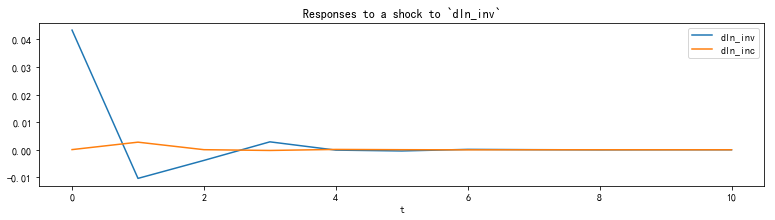

In [5]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

## Example 2: VMA

A vector moving average model can also be formulated. Below we show a VMA(2) on the same data, but where the innovations to the process are uncorrelated. In this example we leave out the exogenous regressor but now include the constant term.

In [6]:
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(0,2), error_cov_type='diagonal')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                             VMA(2)   Log Likelihood                 353.887
                              + intercept   AIC                           -683.775
Date:                    Tue, 24 Dec 2019   BIC                           -655.965
Time:                            15:05:52   HQIC                          -672.671
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                68.79, 39.25   Jarque-Bera (JB):         12.51, 13.94
Prob(Q):                        0.00, 0.50   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.44, 0.81   Skew:                      0.05, -0.49
P

## Caution: VARMA(p,q) specifications

Although the model allows estimating VARMA(p,q) specifications, these models are not identified without additional restrictions on the representation matrices, which are not built-in. For this reason, it is recommended that the user proceed with error (and indeed a warning is issued when these models are specified). Nonetheless, they may in some circumstances provide useful information.

In [7]:
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(1,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                         VARMA(1,1)   Log Likelihood                 354.284
                              + intercept   AIC                           -682.567
Date:                    Tue, 24 Dec 2019   BIC                           -652.440
Time:                            15:05:56   HQIC                          -670.538
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                68.75, 39.04   Jarque-Bera (JB):         10.79, 14.11
Prob(Q):                        0.00, 0.51   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.43, 0.91   Skew:                      0.00, -0.46
P